In [90]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
sys.path.append(r'C:/Users/Vaishali/Documents/My Learning/Python/IBL PASA and Propensity/data/script/')

In [3]:
# mapping = pd.read_excel('../data/mapping.xlsx', sheet_name='Sheet1')
# mapping['STATE'] = mapping['STATE'].str.strip().str.upper()

In [5]:
# To be removed before sending it to IBL
import Updated_Data as dt 
data = dt.DataGenerator(354645)
df = data.generate_dataset().reset_index()
df.rename(columns={'index':'ACCOUNT_NO'}, inplace = True)

### Data prep part

In [7]:
# Marital Status
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].str.strip().str.upper()
df['MARITAL_STATUS'] = np.where(df['MARITAL_STATUS'].isin(['WIDOW', 'DIVORCED', 'WIDOWER', 'LEGALLY SEPARATED']), 'WIDOWED/SEPARATED/DIVORCED', 
                                                          np.where(df['MARITAL_STATUS'].isin(['UNMARRIED', 'LIVE-IN RELATIONSHIP']), 'UNMARRIED/ SINGLE',
                                                                                             np.where(df['MARITAL_STATUS'].isin(['UNMARRIED', 'LIVE-IN RELATIONSHIP']), 'UNMARRIED/ SINGLE', df['MARITAL_STATUS'])))

In [8]:
# Occupation
df['OCCUPATION'] = df['OCCUPATION'].str.strip().str.upper()
df['OCCUPATION'] = np.where(df['OCCUPATION'].isin(['OTHERS','CURRENCY','TRANSACTION','INFORMATION TECHNOLOGY','SENP - OTHERS','CURRENT_EMPLOYMENT','FINANCE','SENP - MANUFACTURER','AGENCY','NON WORKING','TRADERS - SHARE / COMMODITY','SENP - SERVICE INDUSTRY','EVENT MANAGEMENT','BULLION / GEM / JEWEL / PRECIOUS METAL TRADER']), 'OTHERS', 
                            np.where(df['OCCUPATION'].isin(['BUSINESS','SMALL BUSINESSMAN','INDUSTRIALIST','DOCTOR','ART AND ANTIQUE DEALER','HARDWARE']), 'BUSINNESS OWNER', 
                                     np.where(df['OCCUPATION'].isin(['SALARIED','PVT EMPLOYEE','PROFESSIONAL','PUBLIC UTILITIES AND SERVICES','ENGINEER','ARCHITECT','MNC','DEFENCE FORCE']), 'SALARIED',
                                              np.where(df['OCCUPATION'].isin(['SELF EMPLOYED','SELF EMPLOYEES PROFESSIONAL (SEP)','AGRICULTURE AND ALLIED ACTIVITIES','TRADER','DOCTOR/ DENTIST','GOVT SERVICE (SELF EMPLOYED)','LAWYER','REAL ESTATE BROKERS','ENGINEERING CONSULTANT','TRANSPORT OPERATOR','CHARTERED ACCOUNTANT','CONSULTANT','AGRICULTURE','Self employed','CA-CS','BROKERS','GOVT FREE LANCER','SHOPKEEPER','FARMER']), 'SELF EMPLOYED', df['OCCUPATION']))))

In [10]:
state_dic = {'STATE': {0: 'MAH',
  1: 'DLI',
  2: 'UTT',
  3: 'GUJ',
  4: 'HARY',
  5: 'PUN',
  6: 'WES',
  7: 'RAJ',
  8: 'TMU',
  9: 'KRA',
  10: 'ADH',
  11: 'MDH',
  12: 'BIH',
  13: 'KER',
  14: 'ORI',
  15: 'JHA',
  16: 'CHHA',
  17: 'ASS',
  18: 'TEA',
  19: 'CA',
  20: 'UTK',
  21: 'HIM',
  22: 'TLG',
  23: 'JMR',
  24: 'GOA',
  25: 'CA)',
  26: '.',
  27: 'TRI',
  28: 'SIK',
  29: 'MNR',
  30: 'PON',
  31: 'NAG',
  32: 'MEG',
  33: 'DAD',
  34: 'AUH',
  35: 'MIZ',
  36: 'DAM',
  37: 'DUB',
  38: 'ODISH',
  39: 'US',
  40: 'UTL',
  41: 'AE',
  42: 'JAR',
  43: 'SG',
  44: 'GB',
  45: 'CHATT',
  46: 'ABU',
  47: 'ADR',
  48: 'JP',
  49: 'FRA',
  50: 'CN',
  51: 'LK',
  52: 'SWE',
  53: 'NG',
  54: 'CDA',
  55: 'ASA',
  56: 'CAN',
  57: 'UTTRA',
  58: 'KR',
  59: 'SA',
  60: 'DHA',
  61: 'AND',
  62: 'MARY',
  63: 'TEL',
  64: 'NET',
  65: 'NZ',
  66: 'MUSC',
  67: 'FOA',
  68: 'LANTA',
  69: 'KW',
  70: 'SWI',
  71: 'NWY',
  72: 'DE',
  73: 'BEL',
  74: 'TEX',
  75: 'LON',
  76: 'CZ',
  77: 'SHA',
  78: 'KE',
  79: 'GOI',
  80: 'IT',
  81: 'ONT',
  82: 'BRN',
  83: 'RSA',
  84: 'KTU',
  85: 'PUE',
  86: 'KAM',
  87: 'PENN',
  88: 'DEL',
  89: 'MY',
  90: 'IND',
  91: 'BNK',
  92: 'DEC',
  93: 'FR',
  94: 'HAR',
  95: 'TMS',
  96: 'TOK',
  97: 'NWK',
  98: 'HK',
  99: 'QAT',
  100: 'BHN',
  101: 'SAH',
  102: 'KEN',
  103: 'GEO',
  104: 'NP',
  105: 'NL',
  106: 'HAMPS',
  107: 'HAW',
  108: 'PAT',
  109: 'SING',
  110: 'TLK',
  111: 'MHM'},
 'STATE_CAT': {0: 'MAHARASHTRA',
  1: 'NRI OR OTHERS',
  2: 'UTTAR PRADESH',
  3: 'GUJARAT',
  4: 'HARYANA',
  5: 'PUNJAB',
  6: 'WEST BENGAL',
  7: 'RAJASTHAN',
  8: 'TAMIL NADU',
  9: 'KARNATAKA',
  10: 'ANDHRA PRADESH',
  11: 'MADHYA PRADESH',
  12: 'BIHAR',
  13: 'KERALA',
  14: 'ORISSA',
  15: 'JHARKHAND',
  16: 'CHHATTISGARH',
  17: 'ASSAM',
  18: 'NRI OR OTHERS',
  19: 'NRI OR OTHERS',
  20: 'UTTARAKHAND',
  21: 'HIMACHAL PRADESH',
  22: 'NRI OR OTHERS',
  23: 'JAMMU & KASHMIR',
  24: 'GOA',
  25: 'NRI OR OTHERS',
  26: 'NRI OR OTHERS',
  27: 'TIRIPURA',
  28: 'SIKKIM',
  29: 'MANIPUR',
  30: 'PONDICHERRY',
  31: 'NAGALAND',
  32: 'MEGALAYA',
  33: 'DADRA & NAGAR HAVELI',
  34: 'NRI OR OTHERS',
  35: 'MIZORAM',
  36: 'DAMAN AND DIU',
  37: 'NRI OR OTHERS',
  38: 'ORISSA',
  39: 'NRI OR OTHERS',
  40: 'NRI OR OTHERS',
  41: 'NRI OR OTHERS',
  42: 'NRI OR OTHERS',
  43: 'NRI OR OTHERS',
  44: 'NRI OR OTHERS',
  45: 'CHHATTISGARH',
  46: 'NRI OR OTHERS',
  47: 'NRI OR OTHERS',
  48: 'NRI OR OTHERS',
  49: 'NRI OR OTHERS',
  50: 'NRI OR OTHERS',
  51: 'NRI OR OTHERS',
  52: 'NRI OR OTHERS',
  53: 'NRI OR OTHERS',
  54: 'NRI OR OTHERS',
  55: 'NRI OR OTHERS',
  56: 'NRI OR OTHERS',
  57: 'UTTARANCHAL',
  58: 'NRI OR OTHERS',
  59: 'NRI OR OTHERS',
  60: 'NRI OR OTHERS',
  61: 'ANDAMAN AND NICOBAR',
  62: 'NRI OR OTHERS',
  63: 'TELANGANA',
  64: 'NRI OR OTHERS',
  65: 'NRI OR OTHERS',
  66: 'NRI OR OTHERS',
  67: 'NRI OR OTHERS',
  68: 'NRI OR OTHERS',
  69: 'NRI OR OTHERS',
  70: 'NRI OR OTHERS',
  71: 'NRI OR OTHERS',
  72: 'NRI OR OTHERS',
  73: 'NRI OR OTHERS',
  74: 'NRI OR OTHERS',
  75: 'NRI OR OTHERS',
  76: 'NRI OR OTHERS',
  77: 'NRI OR OTHERS',
  78: 'NRI OR OTHERS',
  79: 'NRI OR OTHERS',
  80: 'NRI OR OTHERS',
  81: 'NRI OR OTHERS',
  82: 'NRI OR OTHERS',
  83: 'NRI OR OTHERS',
  84: 'NRI OR OTHERS',
  85: 'NRI OR OTHERS',
  86: 'NRI OR OTHERS',
  87: 'NRI OR OTHERS',
  88: 'DELHI',
  89: 'NRI OR OTHERS',
  90: 'NRI OR OTHERS',
  91: 'NRI OR OTHERS',
  92: 'NRI OR OTHERS',
  93: 'NRI OR OTHERS',
  94: 'NRI OR OTHERS',
  95: 'NRI OR OTHERS',
  96: 'NRI OR OTHERS',
  97: 'NRI OR OTHERS',
  98: 'NRI OR OTHERS',
  99: 'NRI OR OTHERS',
  100: 'NRI OR OTHERS',
  101: 'NRI OR OTHERS',
  102: 'NRI OR OTHERS',
  103: 'NRI OR OTHERS',
  104: 'NRI OR OTHERS',
  105: 'NRI OR OTHERS',
  106: 'NRI OR OTHERS',
  107: 'NRI OR OTHERS',
  108: 'NRI OR OTHERS',
  109: 'NRI OR OTHERS',
  110: 'NRI OR OTHERS',
  111: 'NRI OR OTHERS'}}

In [11]:
state_map = pd.DataFrame(state_dic)

In [12]:
# df = pd.merge(df, state_map, on = 'STATE', how = 'left') # This line needs to be uncommented before sharing it with IBL
df['STATE_CAT'] = df['STATE'].str.strip().str.upper() # this line needs to be commented before sharing with IBL

north = ['DELHI','HARYANA','UTTAR PRADESH','CHANDIGARH','RAJASTHAN','PUNJAB','UTTARANCHAL','JAMMU & KASHMIR','HIMACHAL PRADESH','UTTARAKHAND','MADHYA PRADESH']
east = ['WEST BENGAL','CHHATTISGARH','JHARKHAND','ORISSA','ASSAM','BIHAR','TRIPURA','SIKKIM','MEGHALAYA','MANIPUR','ARUNACHAL PRADESH','MIZORAM','NAGALAND']
west = ['RAJASTHAN','MAHARASHTRA','GOA','GUJARAT','MADHYA PRADESH','DAMAN AND DIU','DADRA & NAGAR HAVELI']
south = ['ANDHRA PRADESH','KARNATAKA','TAMIL NADU','TELANGANA','KERALA','PONDICHERRY']

df['ZONE'] = np.where(df['STATE_CAT'].isin(north), 'NORTH', 
                      np.where(df['STATE_CAT'].isin(east), 'EAST',
                               np.where(df['STATE_CAT'].isin(west), 'WEST',
                                        np.where(df['STATE_CAT'].isin(south), 'SOUTH', 'NRI/ OUT OF INDIA'))))


In [13]:
from datetime import datetime

In [14]:
df['KYC_LAST_DONE_DATE'] = pd.to_datetime(df['KYC_LAST_DONE_DATE'])
df = df[~df['KYC_LAST_DONE_DATE'].isna()].reset_index(drop = True)
df['KYC_RECENCY_YEARS'] = (datetime.now() - df['KYC_LAST_DONE_DATE'])/np.timedelta64(1, 'D')/365

In [15]:
# Function to create buckets
def assign_bucket(var, ranges, label):
    for i, range in enumerate(ranges):
        if var > range:
            return label[i]
    return label[-1] if var > range[-1] else 'Not Available'

In [16]:
kyc_ranges = [0.5, 1, 3, 5]
kyc_labels = ['Less than 6 Months', '6 Months to 1 Year', '1 to 3 Years', '3 to 5 Years', 'More than 5 Years']

df['KYC_RECENCY_BUCKET'] = df['KYC_RECENCY_YEARS'].apply(assign_bucket, args = (kyc_ranges,kyc_labels))

In [58]:
# Converting target into binary
df['TARGET_LI'] = np.where(df['TARGET_LI']=='Y', 1, 0)

In [59]:
cat_cols = ['ACCOUNT_TYPE',
'CUSTOMER_TAG', # Has lot of values - need input from the bank
'EDUCATION_LEVEL',
'GENDER',
'INTERNET_BANKING_USAGE',
'MARITAL_STATUS',
'NOMINEE_AVAILABLE_FLAG',
'RM_ALLOCATED_FLAG',
'OCCUPATION',
# 'STATE',
'KYC_RECENCY_BUCKET', # Derived
'FD_FLAG', 
'GI_FLAG', 
'HEALTH_FLAG', 
'MASS_FLAG', 
'MF_FLAG', 
'NR_FLAG',
'ZONE' # Derived
]

num_cols = ['AGE', 'AQB_BALANCE', 'AUM', 'CIBIL_SCORE', 'CREDIT_CARD_LIMIT', 'CR_AMT_12MNTH', 'CR_CNT_12MNTH',
            'DC_APPAREL_30DAYS_ACTV', 'DC_ECOM_30DAYS_AMT', 'DC_ECOM_30DAYS_CNT', 'DC_FOOD_30DAYS_ACTV',
            'DC_FUEL_30DAYS_ACTV', 'DC_GROCRY_30DAYS_ACTV', 'DC_OTT_30DAYS_ACTV', 'DC_POS_30DAYS_AMT',
            'DC_POS_30DAYS_CNT', 'DC_RECHARGE_30DAYS_ACTV', 'DC_TRAVEL_30DAYS_ACTV', 'DC_UTILITY_30DAYS_ACTV',
            'DR_AMT_12MNTH', 'DR_CNT_12MNTH', 'DR_CR_RATIO', 'FD_COUNT', 'FD_CURRENTMONTHANR',  # 'INCOME_NET', removing due to less fill rate
            'MONTHLY_BALANCE', 'NRV', 'TOTAL_LIVE_SECURED_AMT', 'TOTAL_LIVE_UNSECURED_AMT',
            'VINTAGE_DAYS']

target = 'TARGET_LI'

In [60]:
# Missing value treatment for categorical variables
for cat in cat_cols:
    df[cat] = np.where(df[cat].isna(), 'Not Available', df[cat])

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [62]:
train, test_valid = train_test_split(df, test_size=0.4, random_state=42, stratify=df['TARGET_LI'])
test, valid = train_test_split(test_valid, test_size=0.5, random_state=42, stratify=test_valid['TARGET_LI'])

In [63]:
train['TARGET_LI'].value_counts(normalize = True)

TARGET_LI
0    0.850677
1    0.149323
Name: proportion, dtype: float64

In [64]:
test['TARGET_LI'].value_counts(normalize = True)

TARGET_LI
0    0.850668
1    0.149332
Name: proportion, dtype: float64

In [65]:
valid['TARGET_LI'].value_counts(normalize = True)

TARGET_LI
0    0.850682
1    0.149318
Name: proportion, dtype: float64

In [66]:
# Missing value treatment for continuous variables
# We are assuming that all the continious variables are skewed and median will be the better representative of the central tendency
# Hence we will replace any missing value with respective median value

imputer = KNNImputer(n_neighbors=5)
imputer_fit = imputer.fit(train[num_cols])

In [67]:
train[num_cols] = imputer_fit.fit_transform(train[num_cols])
test[num_cols] = imputer_fit.fit_transform(test[num_cols])
valid[num_cols] = imputer_fit.fit_transform(valid[num_cols])

In [68]:
# Scaling numerical parameters using standard scaler
scaler = StandardScaler()
scaler_fit = scaler.fit(train[num_cols])

train[num_cols] = scaler_fit.fit_transform(train[num_cols])
test[num_cols] = scaler_fit.fit_transform(test[num_cols])
valid[num_cols] = scaler_fit.fit_transform(valid[num_cols])

In [69]:
# Label encoding categorical variables
le = LabelEncoder()


for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    valid[col] = le.fit_transform(valid[col])

In [70]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# class ModelEvaluator:
#     def __init__(self, classifiers):
#         self.classifiers = classifiers
#         self.results = {}

#     def train_and_evaluate(self, X_train, y_train, X_test, y_test):
#         for name, model in self.classifiers.items():
#             print(f"Training {name}...")
#             if name == "Logistic Regression":
#                 model.fit(X_train, y_train)
#                 y_pred = model.predict(X_test)
#             else:
#                 model.fit(X_train, y_train)
#                 y_pred = model.predict(X_test)
            
#             # Calculate accuracy
#             accuracy = accuracy_score(y_test, y_pred)
#             self.results[name] = accuracy
            
#             # Print confusion matrix and classification report
#             print(f"\n{name} Results:")
#             print("Confusion Matrix:")
#             print(confusion_matrix(y_test, y_pred))
#             print("\nClassification Report:")
#             print(classification_report(y_test, y_pred, zero_division=1))

In [71]:
# classifiers = {
#     "Random Forest": RandomForestClassifier(),
#     "Logistic Regression": LogisticRegression(max_iter=2000)
# }

In [72]:
# model_obj = ModelEvaluator(classifiers=classifiers)

In [73]:
# model_obj.train_and_evaluate(X_train=train[cat_cols + num_cols], y_train=train['TARGET_LI'], X_test=test[cat_cols + num_cols], y_test=test['TARGET_LI'])

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Visualization script
class ModelViz:

    def __init__(self) -> None:
        pass

    @staticmethod
    def get_optimum_threshold(df, target='Target', score='Score'):
        '''
        Given probability scores and binary target, returns the optimum cut off point, where 
        `true positive rate` is high and `false positive rate` is low.

        Parameters
        ----------
        df: pandas.DataFrame, Dataframe that contains binary target values - 0 & 1 and prediction scores
        target: str, Name of the target column. Default = Target
        score: str, Name of the probability score column. Default = Score

        Returns
        -------
        float: returns ROC AUC
        pd.DataFrame: returns a new DataFrame that provides tpr, fpr and optimum threshold
        matplotlib.pyplot: returns a ROC curve with cut-off point
        matplotlib.pyplot: returns a Target Separability Plot with threshold

        '''
        fpr, tpr, thresholds = metrics.roc_curve(df[target], df['Score'])
        roc_auc = metrics.auc(fpr, tpr)

        ####################################
        # The optimal cut off would be where tpr is high and fpr is low
        # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
        ####################################
        i = np.arange(len(tpr))  # index for df
        roc = pd.DataFrame({
            'fpr': pd.Series(fpr, index=i),
            'tpr': pd.Series(tpr, index=i),
            '1-fpr': pd.Series(1-fpr, index=i),
            'tf': pd.Series(tpr - (1-fpr), index=i),
            'thresholds': pd.Series(thresholds, index=i)
        })

        cutoff_df = roc.iloc[(roc.tf-0).abs().argsort()
                             [:1]].reset_index(drop=True)

        # Plot tpr vs 1-fpr
        fig, ax = plt.subplots()
        plt.plot(roc['tpr'], label='tpr')
        plt.plot(roc['1-fpr'], color='red', label='1-fpr')
        plt.xlabel('1-False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        ax.set_xticklabels([])
        plt.legend()

        # Plot tpr vs 1-fpr
        fig2, ax2 = plt.subplots()
        sns.kdeplot(x=df[df[target] == 0]['Score'], label='0')
        sns.kdeplot(x=df[df[target] == 1]['Score'], label='1')
        plt.axvline(x=cutoff_df['thresholds'].values[0],
                    label='thresh={:.2f}'.format(cutoff_df['thresholds'].values[0]), color='red', ls='--')
        plt.title('Target Separability')
        plt.legend()

        return roc_auc, cutoff_df, ax, ax2

    @staticmethod
    def get_decile_score(df, target='Target', score='Score', qcut_duplicates='drop', req_dig=True, category=None):
        '''
        Given probability scores and binary target, returns decile scores and cumulative gain plot

        Parameters
        ----------
        df: pandas.DataFrame, Dataframe that contains binary target values - 0 & 1 and prediction scores
        target: str, Name of the target column. Default = Target
        score: str, Name of the probability score column. Default = Score

        Returns
        -------
        pd.DataFrame: returns a new DataFrame that provides Decile Scores
        matplotlib.pyplot: returns a cumulative gain plot object

        '''

        df['inv_score'] = 1 - df[score]

        df.sort_values(by='inv_score', ascending=False,
                    #    ignore_index=True, 
                       inplace=True)
        if category is None:
            df['DecileRank'] = pd.qcut(
                df['inv_score'], q=10, labels=False, duplicates=qcut_duplicates) + 1
        else:
            df['DecileRank'] = df.groupby([category])['inv_score'].transform(
                     lambda x: pd.qcut(x, 10, labels=False, duplicates=qcut_duplicates)) + 1

        decile_performance = df.groupby('DecileRank')[target].agg(
            ['count', 'sum']).sort_values(by='DecileRank', ascending=True).reset_index()
        decile_performance['cumsum'] = np.cumsum(decile_performance['sum'])
        decile_performance['gain'] = decile_performance['cumsum'] / \
            decile_performance['sum'].sum() * 100

        if req_dig:
            ax = plt.figure(figsize=(12, 8))
            plt.title('Decile Score - Cumulative Gain Plot')
            sns.lineplot(
                x=decile_performance['DecileRank'], y=decile_performance['gain'], label='model')
            sns.lineplot(x=decile_performance['DecileRank'],
                         y=decile_performance['DecileRank']*10, label='avg')

            return decile_performance, ax
        else:
            return decile_performance

    @staticmethod
    def get_classification_report(clf, X, y, thres=0.5):
        '''
        Given model, X and y provides classification report for the model

        Parameters
        ----------
        clf: sklearn model, trained classification model that has predict_proba available
        X: pandas.DataFrame or numpy array, Dataframe/array that acts as independent variables for the model
        y: pandas.Series or numpy 1D-array, Series/1D-array that acts as the dependant/target variable for the model
        thres: float, optional. The probability threshold to determine 0 or 1. Default is 0.5

        Returns
        -------
        classification report: str, returns classification report

        '''

        x_train_proba = clf.predict_proba(X)[:, 1]
        x_train_pred = np.where(x_train_proba > thres, 1, 0)

        clf_report = metrics.classification_report(y, x_train_pred)

        return clf_report

    @staticmethod
    def get_d3_gain(y_actual, y_prob):
        '''
        Given ytrue and yproba returns the 3rd decile cumulative gain 

        Parameters
        ----------
        y_actual: pandas.Series or numpy 1D-array, Binary valued Series/1D-array that is actual values
        y_prob: pandas.Series or numpy 1D-array, Series/1D-array that is the probability score of y_actual being 1

        Returns
        -------
        classification report: str, returns classification report

        '''
        test_result = pd.DataFrame(y_actual.copy(), columns=['Target'])
        test_result['Score'] = y_prob

        ds = ModelViz.get_decile_score(test_result, req_dig=False)

        return ds[ds['DecileRank'] == 3]['gain'].values[0]

In [115]:
# Useful function to create decile wise capture rate and impose it to the test and validation set
# decile_prob = list(train_result.groupby('DecileRank')['Score'].min()) # Sample

def decile_fun(score, prob_list):
  if score >= prob_list[0]:
    decile = 1
  elif score >= prob_list[1] < prob_list[0]:
    decile = 2
  elif score >= prob_list[2] < prob_list[1]:
    decile = 3
  elif score >= prob_list[3] < prob_list[2]:
    decile = 4
  elif score >= prob_list[4] < prob_list[3]:
    decile = 5
  elif score >= prob_list[5] < prob_list[4]:
    decile = 6
  elif score >= prob_list[6] < prob_list[5]:
    decile = 7
  elif score >= prob_list[7] < prob_list[6]:
    decile = 8
  elif score >= prob_list[8] < prob_list[7]:
    decile = 9
  else:
    decile = 10
  return decile

def decile_summary(prob, actual, prob_list, req_dig=True):
  Decile = [decile_fun(col, prob_list) for col in prob]
  results = pd.DataFrame({'Sum': actual,'Count': actual,'Probability': prob}).reset_index(drop = True)
  results['Decile'] = Decile
  decile_sum = results.groupby('Decile')['Sum'].sum().reset_index()
  decile_cumsum = decile_sum['Sum'].cumsum().reset_index()
  decile_cumsum.columns = ['Decile', 'CumSum']
  decile_cumsum['Decile'] = decile_cumsum['Decile'] + 1
  decile_count = results.groupby('Decile')['Count'].count().reset_index()
  Decile_sum=decile_sum.join(decile_count.set_index('Decile'),on='Decile')
  Decile_sum=Decile_sum.join(decile_cumsum.set_index('Decile'),on='Decile')
  Decile_sum['gain'] = Decile_sum['CumSum']/decile_sum['Sum'].sum()
  Decile_sum['Event Rate']=Decile_sum['Sum']/Decile_sum['Count']
  if req_dig:
    ax = plt.figure(figsize=(12, 8))
    plt.title('Decile Score - Cumulative Gain Plot')
    sns.lineplot(
        x = Decile_sum['Decile'], y=Decile_sum['gain']*100, label='model')
    sns.lineplot(x=Decile_sum['Decile'],
                  y=Decile_sum['Decile']*10, label='avg')

    return Decile, Decile_sum, ax
  else:
      return Decile, Decile_sum

In [78]:
from scipy import stats

# Chi-Square Test and Cramer's v
def chi_sq_test(df, x,y):
    cross_tabs = pd.crosstab(df[x], df[y])
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    if p < 0.05:
        decision = 'Reject H0: there is significant association between ' + x + ' and ' + y
        # calculating cramer's v
        n = cross_tabs.sum().sum()
        minimum_dimension = min(cross_tabs.shape)-1
        v = np.sqrt(chi2/(n*dof))
        if v <= 0.2:
            strength = 'Weak Association between '  + x + ' and ' + y
        elif v > 0.2 and v <= 0.6:
            strength = 'Medium Association between '  + x + ' and ' + y
        else:
            strength = 'Strong Association between '  + x + ' and ' + y
    else: 
        decision = 'Do not reject H0: There is no relation between ' + x + ' and ' + y
        strength = 'No association between '  + x + ' and ' + y
        v = 0
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')
    print(decision)
    print("Cramer's V: " + str(v))
    print(strength)
    return p


def cont_test(df, x, target):
    # Perform the two sample t-test with equal variances
    t = stats.ttest_ind(a=df[df[target]==1][x], b=df[df[target]==0][x], equal_var=True)
    print(df[df[target]==1][x].mean(), df[df[target]==0][x].mean())
    return t.pvalue

# cont Features selections
Row = 0
for i in num_cols:
    out = cont_test(train, i, target)
    if out < 0.05:
        Row = Row + 1
        if Row == 1:
            significant = [i]
        else:
            significant = significant + [i]

0.00253614986770205 -0.0004451814283855314
0.008575486946080438 -0.0015052925603396446
0.008295995475034304 -0.001456232205552699
0.0063064545379703 -0.001106999422635326
0.0024146978715706975 -0.0004238624307166435
0.0002160552959822527 -3.79251267840059e-05
-0.0006367795528821889 0.00011177668738323908
-0.0020760434843915786 0.0003644169516721535
0.003247027921665204 -0.0005699649482799186
0.00916616651316735 -0.0016089771165019372
0.003265353274583539 -0.0005731816772642155
0.0006833441959738146 -0.00011995038192212307
-0.00042632330897633913 7.483438658790021e-05
-0.003106255926108054 0.0005452546269946276
-0.0015349259728142846 0.00026943223890101405
-0.002437263210752356 0.0004278234229498583
0.000639861250266786 -0.00011231763114225446
-0.009174013530943869 0.0016103545376972524
0.007337436863065579 -0.0012879722389388748
-0.0006651711065190702 0.00011676038040663279
0.004568065539979533 -0.0008018524330700584
-0.0026182053249601566 0.0004595849800582441
0.00534547792962543 -0.0

In [81]:
## Below block needs to be uncommented before sharing the code with IBL
# # cat Features selections
# Row = 0
# for i in cat_cols:
#     out = chi_sq_test(train, i, 'TARGET_LI')
#     if out < 0.05:
#         Row = Row + 1
#         if Row == 1:
#             significant_cat = [i]
#         else:
#             significant_cat = significant_cat + [i]

# s_features = significant_cat + significant

In [ ]:
model = 'RF'

In [83]:
if model == 'RF':

    # Random Forest
    model = RandomForestClassifier(bootstrap=False,
    max_depth= 4,
    max_features= 'sqrt',
    min_samples_leaf=55,
    min_samples_split= 10,
    n_estimators= 200, 
    class_weight='balanced', 
    random_state=42)

    model.fit(train[cat_cols + num_cols],train[target]) # cat_cols + num_cols needs to be replaced with s_features
    importance = model.feature_importances_

    # summarize feature importance
    feature_imp = pd.DataFrame({'Feature':s_features, 'Importance':importance}).sort_values('Importance', ascending=False)
    print('Feature Importance:\n', feature_imp)
else: 
    model = LogisticRegression(class_weight='balanced')
    model.fit(train[cat_cols + num_cols],train[target]) # cat_cols + num_cols needs to be replaced with s_features

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       min_samples_leaf=55, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [88]:
feature = cat_cols + num_cols

In [120]:
def model_result(test_df, features, target, iftrain = 'Yes'):
    train_result = pd.DataFrame(test_df[target].copy()) 
    y_pred_train =[x[1] for x in model.predict_proba(test_df[features])] # feature needs to be replaced with s_feature
    train_result['Score'] = y_pred_train
    roc_auc, cutoff_df, ax, ax2 = ModelViz.get_optimum_threshold(train_result, target=target)
    print(f'ROC AUC Score at an Optimum Threshold: {cutoff_df} \n',roc_auc_score(test_df[target],y_pred_train))
    if iftrain == 'Yes':
        train_result['Decile'] = 10 - pd.qcut(train_result['Score'], 10, labels=False)
        decile_prob = list(train_result.groupby('Decile')['Score'].min())
        return train_result, decile_prob
    else:
        return train_result

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21448\4286647126.py:62: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[df[target] == 0]['Score'], label='0')
C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21448\4286647126.py:63: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[df[target] == 1]['Score'], label='1')


ROC AUC Score at an Optimum Threshold:         fpr       tpr     1-fpr        tf  thresholds
0  0.465033  0.534966  0.534967 -0.000001    0.499496 
 0.5535057727796632


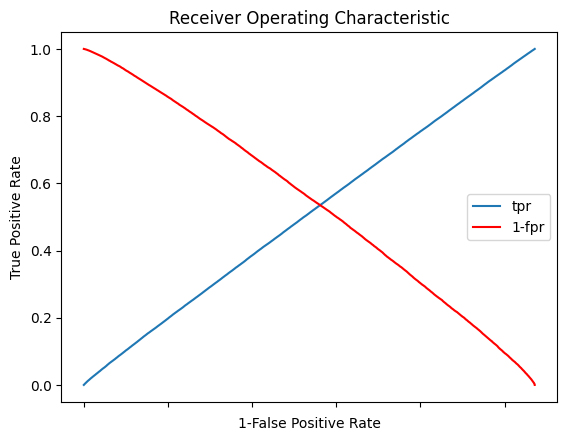

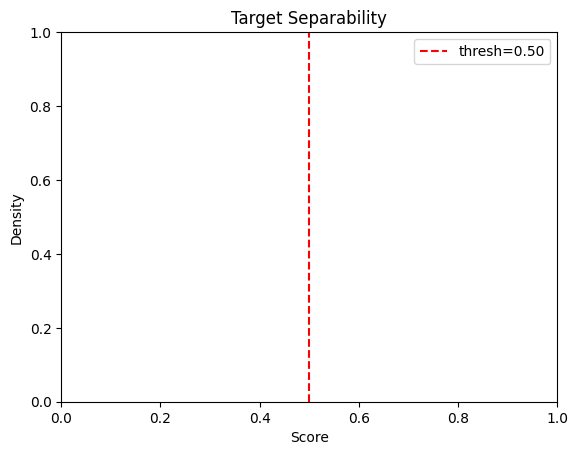

In [121]:
train_result, decile_prob = model_result(train, feature, target)

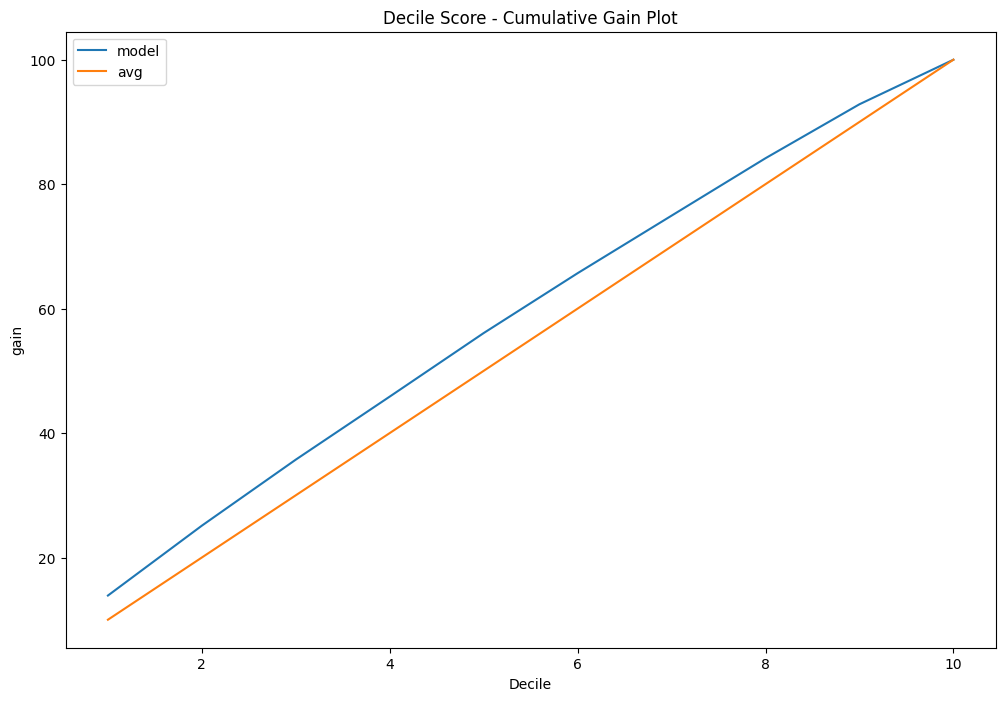

In [122]:
training_decile, train_decile_summary, ax = decile_summary(prob = train_result['Score'], actual = train_result['TARGET_LI'], prob_list = decile_prob)

In [112]:
train_decile_summary

,Decile,Sum,Count,CumSum,gain,Event Rate
0,1,4412,21279,4412,0.138856,0.207341
1,2,3569,21279,7981,0.251180,0.167724
2,3,3372,21278,11353,0.357305,0.158474
3,4,3219,21279,14572,0.458614,0.151276
4,5,3244,21278,17816,0.560710,0.152458
5,6,3057,21279,20873,0.656921,0.143663
6,7,2938,21279,23811,0.749386,0.138070
7,8,2933,21278,26744,0.841694,0.137842
8,9,2755,21279,29499,0.928401,0.129470
9,10,2275,21279,31774,1.000000,0.106913


C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21448\4286647126.py:62: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[df[target] == 0]['Score'], label='0')
C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21448\4286647126.py:63: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[df[target] == 1]['Score'], label='1')


ROC AUC Score at an Optimum Threshold:         fpr       tpr     1-fpr        tf  thresholds
0  0.506803  0.493202  0.493197  0.000006    0.499285 
 0.49105372336078923
   Decile   Sum  Count  CumSum      gain  Event Rate
0       1   984   6910     984  0.092900    0.142402
1       2  1040   7079    2024  0.191088    0.146913
2       3   991   7080    3015  0.284649    0.139972
3       4  1051   7049    4066  0.383875    0.149099
4       5  1100   7292    5166  0.487727    0.150850
5       6  1085   7253    6251  0.590162    0.149593
6       7  1066   6989    7317  0.690804    0.152525
7       8  1088   7031    8405  0.793523    0.154743
8       9  1080   7207    9485  0.895487    0.149854
9      10  1107   7039   10592  1.000000    0.157267


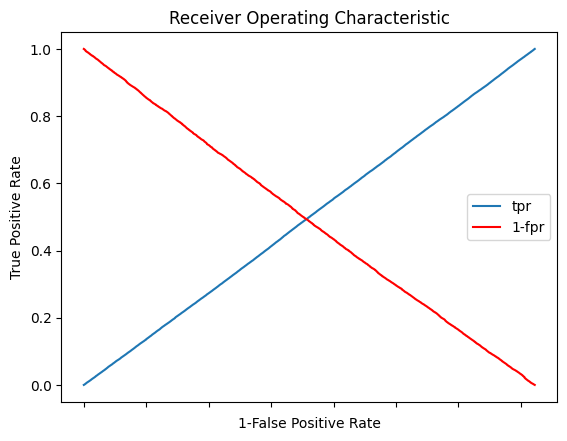

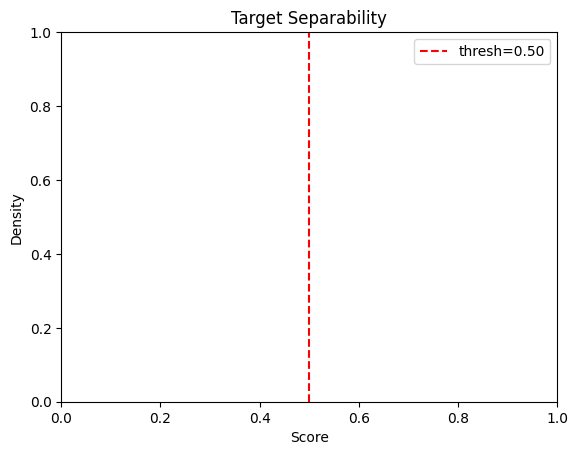

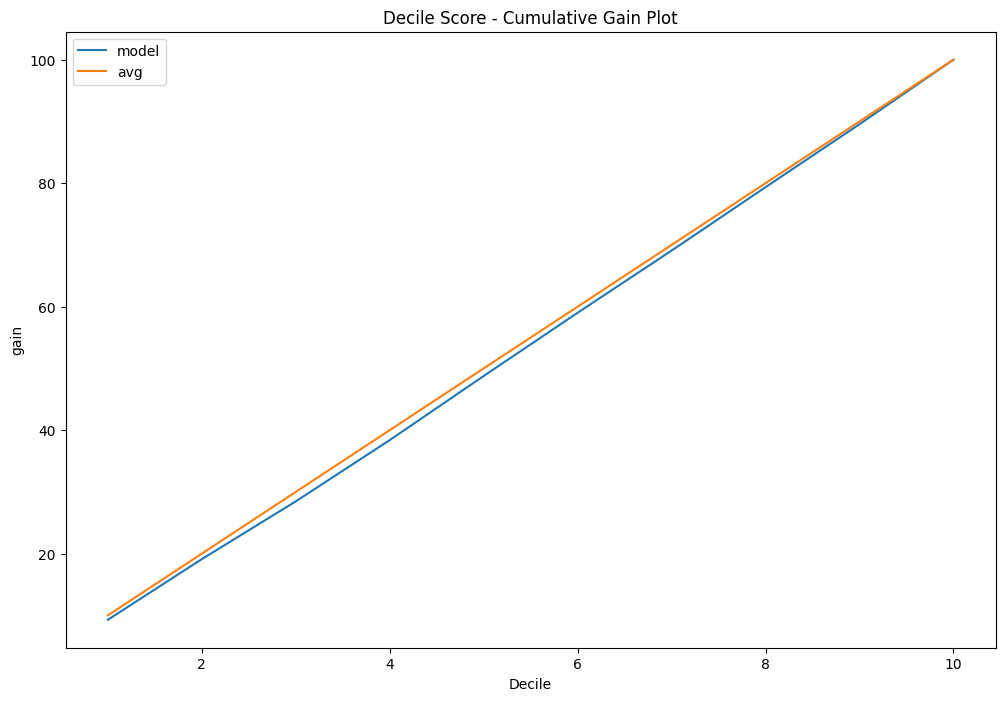

In [127]:
test_result = model_result(test, feature, target, iftrain=False)
test_decile, test_decile_summary, ax = decile_summary(prob = test_result['Score'], actual = test_result['TARGET_LI'], prob_list = decile_prob)
print(test_decile_summary)

In [ ]:
valid_result = model_result(valid, feature, target, iftrain=False)
valid_decile, valid_decile_summary, ax = decile_summary(prob = valid_result['Score'], actual = valid_result['TARGET_LI'], prob_list = decile_prob)
print(valid_decile_summary)